Stars Classification

Project Overview: This project aims to classify the type of stars based on classification techniques learned in class.

In [35]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



In [36]:
stars<- read.csv("data/Stars.csv")
stars<- mutate(stars, Spectral_Class = as.factor(Spectral_Class))
stars

Temperature,L,R,A_M,Color,Spectral_Class,Type
<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<int>
3068,0.002400,0.17000,16.120,Red,M,0
3042,0.000500,0.15420,16.600,Red,M,0
2600,0.000300,0.10200,18.700,Red,M,0
2800,0.000200,0.16000,16.650,Red,M,0
1939,0.000138,0.10300,20.060,Red,M,0
2840,0.000650,0.11000,16.980,Red,M,0
2637,0.000730,0.12700,17.220,Red,M,0
2600,0.000400,0.09600,17.400,Red,M,0
2650,0.000690,0.11000,17.450,Red,M,0


In [80]:
set.seed(200)

stars_recipe <- recipe(Spectral_Class ~ Temperature + L + R + A_M, data = stars) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

stars_scaled<- stars_recipe %>%
    prep()%>%
    bake(stars)

stars_scaled %>%
select(A_M, L, Spectral_Class)


A_M,L,Spectral_Class
<dbl>,<dbl>,<fct>
1.1144164,-0.5973751,M
1.1599895,-0.5973751,M
1.3593722,-0.5973751,M
1.1647367,-0.5973751,M
1.4884962,-0.5973751,M
1.1960683,-0.5973751,M
1.2188549,-0.5973751,M
1.2359448,-0.5973751,M
1.2406920,-0.5973751,M


In [57]:
stars_split <- initial_split(stars_scaled, prop= 0.75, strata= Spectral_Class)
stars_train <- training(stars_split)
stars_test <- testing(stars_split)

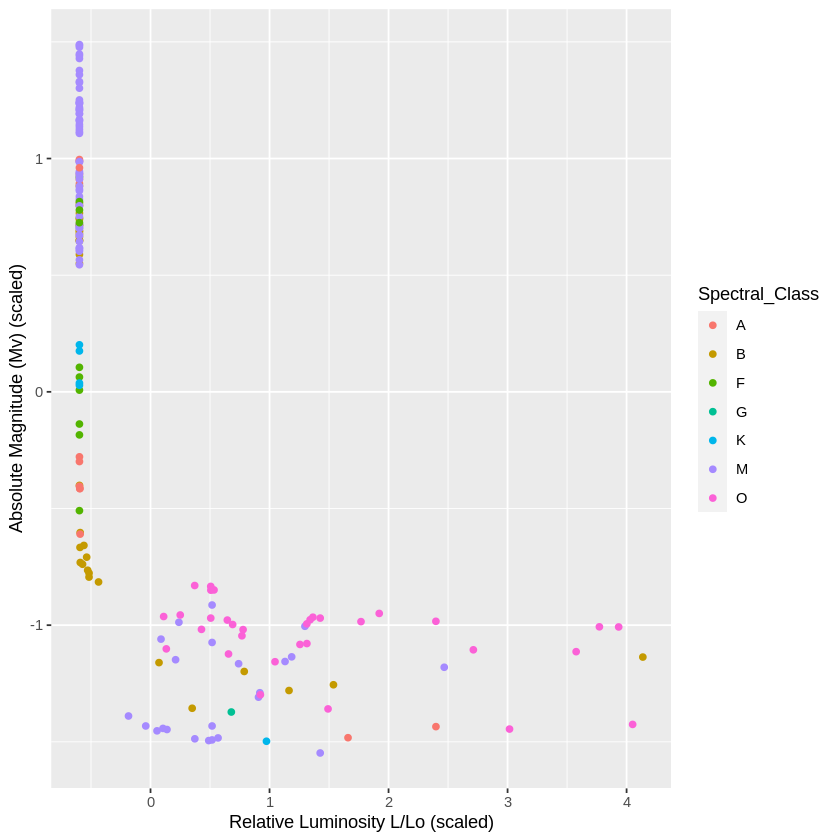

In [82]:
stars_plot <- ggplot(stars_train, aes(x= L, y= A_M, colour= Spectral_Class))+
geom_point()+
xlab("Relative Luminosity L/Lo (scaled)")+
ylab("Absolute Magnitude (Mv) (scaled)")
stars_plot

#Visualization of training data of star spectral type based on predictors Temperature and Luminosity

Most M stars have high temperature and low luminosity. Most O stars have low 
temperature and a range of luminosity. Most B, F, G stars have average temperature and 
low luminosity. 

